# Demo for how to calibrate PSF (and possibly other parameters) from line-profiles of fluorescence

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../../sl2pm')

import track_vessel_A, track_vessel_B, track_vessel_C
from models import L_wall_plasma, L_plasma_no_glx, L_wall
import misc

## Protocol A (both plasma and wall fluorescence)

In [2]:
kymo_wall = np.load('wall.npy')
kymo_plasma = np.load('plasma.npy')

N_AVER, nx = kymo_wall.shape
x = np.arange(nx)

data_wall = np.mean(kymo_wall, axis=0)
data_plasma = np.mean(kymo_plasma, axis=0)

## Enter PMT parameters (known from the calibration)

In [3]:
ALPHA = 0.452
SIGMA = 6.0
GAIN = 3/ALPHA

## Make an initial parameter guess

In [4]:
p0_A = track_vessel_A.p0_ols(data_wall, data_plasma, ALPHA, sigma_blur=1.5)

Text(0, 0.5, 'Fluorescence (a.u.)')

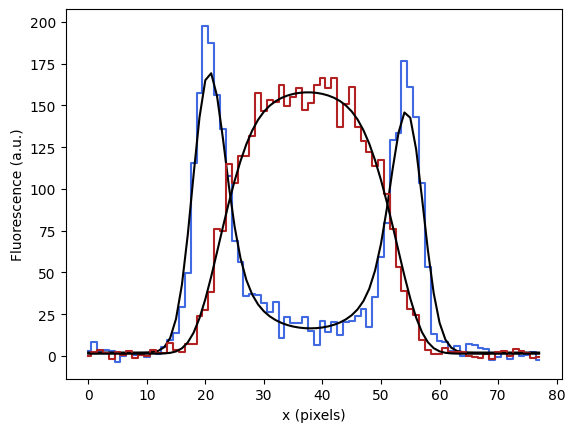

In [5]:
plt.step(x, data_wall, where='mid', c='royalblue')
plt.plot(x, L_wall_plasma(x, *p0_A)[0]*GAIN, c='k')

plt.step(x, data_plasma, where='mid', c='firebrick')
plt.plot(x, L_wall_plasma(x, *p0_A)[1]*GAIN, c='k')

plt.xlabel('x (pixels)')
plt.ylabel('Fluorescence (a.u.)')

## Fit

In [6]:
opt_res_A = track_vessel_A.mle_fit(data_wall, data_plasma, N_AVER, ALPHA, SIGMA, n_r=256, n_phi=256, p0='ols', sigma_blur=1, minimize_options=dict(gtol=1e-3))
opt_res_A

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 552.8399191041701
        x: [ 3.751e+01  2.099e+00  8.536e+00  1.188e+01  1.778e+01
             6.531e+00 -8.464e-02  2.077e+02  2.841e+01 -6.949e-01
             3.378e-01  2.293e-01]
      nit: 27
      jac: [-1.526e-05  9.155e-05 -3.052e-05  0.000e+00  7.629e-06
             1.526e-05 -1.373e-04  0.000e+00  1.526e-05  1.526e-05
             1.526e-05  1.526e-05]
 hess_inv: [[ 5.889e-04  8.311e-05 ... -8.657e-06 -1.757e-05]
            [ 8.311e-05  1.787e-03 ... -4.291e-04 -1.949e-04]
            ...
            [-8.657e-06 -4.291e-04 ...  2.767e-03  4.923e-05]
            [-1.757e-05 -1.949e-04 ...  4.923e-05  2.298e-03]]
     nfev: 442
     njev: 34

Text(0, 0.5, 'Photon count')

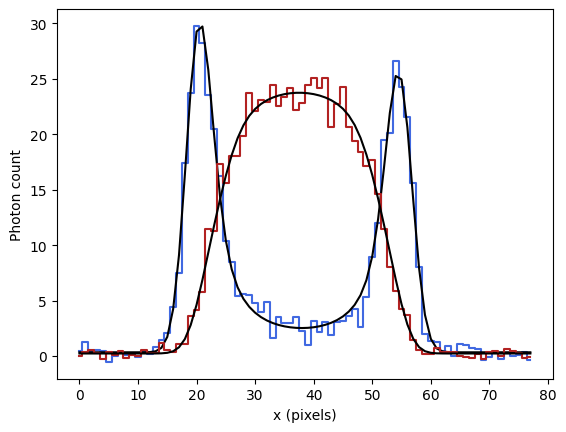

In [7]:
plt.step(x, data_wall/GAIN, where='mid', c='royalblue')
plt.plot(x, L_wall_plasma(x, *opt_res_A.x)[0], c='k')

plt.step(x, data_plasma/GAIN, where='mid', c='firebrick')
plt.plot(x, L_wall_plasma(x, *opt_res_A.x)[1], c='k')

plt.xlabel('x (pixels)')
plt.ylabel('Photon count')

In [8]:
misc.fitted_params(opt_res_A, ['xc', 's_xy', 'l', 'R_lum', 'R_wall', 's_gcx', 'a1', 'Iw', 'Ip', 'b_plasma', 'b_tissue_wall', 'b_tissue_plasma'])

{'xc': (37.51453155478082, 0.02426823268124076),
 's_xy': (2.099004293959188, 0.042274008350460725),
 'l': (8.53646761051506, 1.1910114076602163),
 'R_lum': (11.878142099324467, 0.689107477634326),
 'R_wall': (17.78274067929494, 0.07176187949614524),
 's_gcx': (6.530651509415708, 1.2602297489060739),
 'a1': (-0.08463891805879424, 0.009142827284822854),
 'Iw': (207.7005203348933, 13.552513581588613),
 'Ip': (28.414946186098433, 1.3280236984892206),
 'b_plasma': (-0.6948992276687498, 0.8638211880191945),
 'b_tissue_wall': (0.33780401583466946, 0.05260700612220925),
 'b_tissue_plasma': (0.2293083167069315, 0.047941052194871187)}

***

## Calibration: Protocol B (only plasma fluorescence)

In [9]:
kymo_plasma = np.load('plasma.npy')

N_AVER, nx = kymo_plasma.shape
x = np.arange(nx)

data_plasma = np.mean(kymo_plasma, axis=0)

## Enter PMT parameters (known from the calibration)

In [10]:
ALPHA = 0.452
SIGMA = 6.0
GAIN = 3/ALPHA

## Make an initial parameter guess

In [11]:
p0_B = track_vessel_B.p0_ols(data_plasma, ALPHA, sigma_blur=1.5)

Text(0, 0.5, 'Fluorescence (a.u.)')

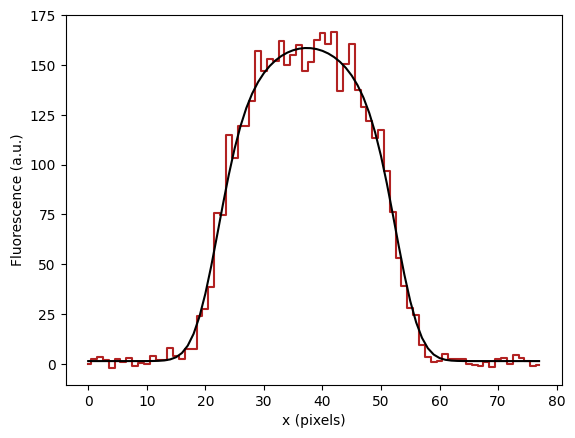

In [12]:
plt.step(x, data_plasma, where='mid', c='firebrick')
plt.plot(x, L_plasma_no_glx(x, *p0_B)*GAIN, c='k')

plt.xlabel('x (pixels)')
plt.ylabel('Fluorescence (a.u.)')

## Fit

In [13]:
opt_res_B = track_vessel_B.mle_fit(data_plasma, N_AVER, ALPHA, SIGMA, n_r=256, p0='ols', sigma_blur=1, minimize_options=dict(gtol=1e-4))
opt_res_B

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 242.47981782274792
        x: [ 3.736e+01  2.578e+00  2.172e+01  1.662e+01  4.507e+01
             2.245e-01]
      nit: 19
      jac: [ 1.144e-05 -9.537e-06 -3.815e-06  1.526e-05  5.722e-06
             9.537e-06]
 hess_inv: [[ 3.151e-03 -3.349e-04 ...  1.309e-02  1.722e-06]
            [-3.349e-04  1.864e-02 ... -5.596e-01 -1.964e-03]
            ...
            [ 1.309e-02 -5.596e-01 ...  6.093e+01  2.268e-02]
            [ 1.722e-06 -1.964e-03 ...  2.268e-02  2.482e-03]]
     nfev: 196
     njev: 28

Text(0, 0.5, 'Photon count')

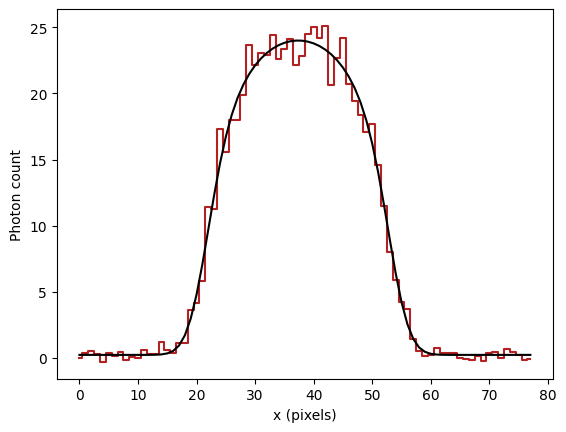

In [14]:
plt.step(x, data_plasma/GAIN, where='mid', c='firebrick')
plt.plot(x, L_plasma_no_glx(x, *opt_res_B.x), c='k')

plt.xlabel('x (pixels)')
plt.ylabel('Photon count')

In [15]:
misc.fitted_params(opt_res_B, ['xc', 's_xy', 'l', 'R_lum', 'I', 'b'])

{'xc': (37.357782853819, 0.05613263896936463),
 's_xy': (2.57815526936566, 0.13653862143872084),
 'l': (21.722950759598866, 5.7404998946873835),
 'R_lum': (16.62119801455387, 0.16168102686124294),
 'I': (45.07027042060205, 7.80573720154943),
 'b': (0.22445510764647286, 0.049818889150076234)}

***

## Calibration: Protocol C (only wall fluorescence)

In [16]:
kymo_wall = np.load('wall.npy')

N_AVER, nx = kymo_wall.shape
x = np.arange(nx)

data_wall = np.mean(kymo_wall, axis=0)

## Enter PMT parameters (known from the calibration)

In [17]:
ALPHA = 0.452
SIGMA = 6.0
GAIN = 3/ALPHA

## Make an initial parameter guess

In [18]:
p0_C = track_vessel_C.p0_ols(data_wall, ALPHA, sigma_blur=1.5)

Text(0, 0.5, 'Fluorescence (a.u.)')

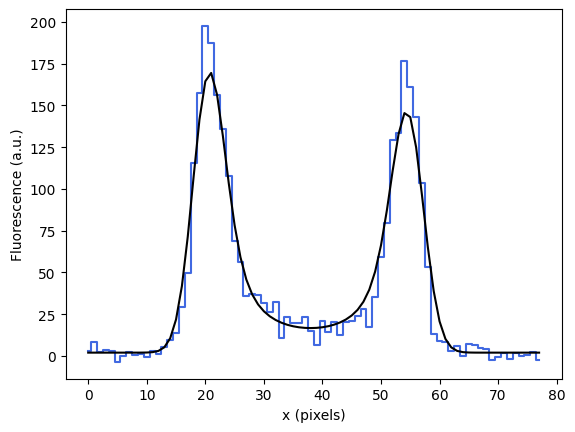

In [19]:
plt.step(x, data_wall, where='mid', c='royalblue')
plt.plot(x, L_wall(x, *p0_C)*GAIN, c='k')

plt.xlabel('x (pixels)')
plt.ylabel('Fluorescence (a.u.)')

## Fit

In [20]:
opt_res_C = track_vessel_C.mle_fit(data_wall, N_AVER, ALPHA, SIGMA, n_r=256, n_phi=256, p0='ols', sigma_blur=1, minimize_options=dict(gtol=1e-4))
opt_res_C

/home/jovyan/work/sl2pm/examples/capillaries/../../sl2pm/models.py:68: RuntimeWarning: invalid value encountered in sqrt
  integrand = gaussian(R - X_PSF, s_xy)*(1 - np.exp(-np.sqrt(R_lum**2 - R**2)/l))


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 302.6080237943083
        x: [ 3.755e+01  2.109e+00  8.115e+00  1.776e+01 -8.535e-02
             2.029e+02 -3.864e-01  3.362e-01]
      nit: 19
      jac: [ 2.289e-05 -4.578e-05  5.341e-05 -2.518e-04 -7.019e-04
             7.629e-06  6.485e-05 -3.052e-05]
 hess_inv: [[ 7.346e-04  5.413e-06 ...  2.268e-04 -2.473e-05]
            [ 5.413e-06  7.677e-04 ... -1.177e-03 -1.479e-04]
            ...
            [ 2.268e-04 -1.177e-03 ...  2.065e-02 -2.216e-03]
            [-2.473e-05 -1.479e-04 ... -2.216e-03  2.832e-03]]
     nfev: 849
     njev: 92

Text(0, 0.5, 'Photon count')

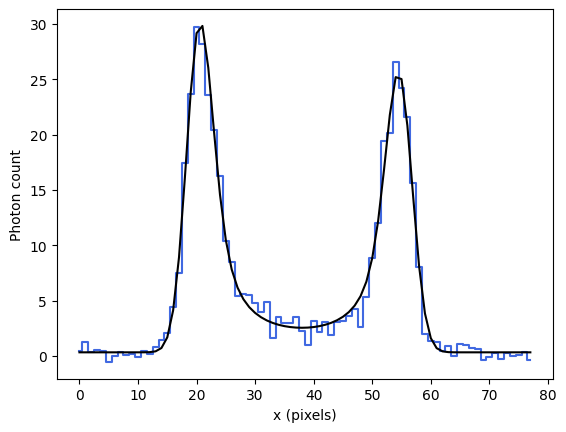

In [21]:
plt.step(x, data_wall/GAIN, where='mid', c='royalblue')
plt.plot(x, L_wall(x, *opt_res_C.x), c='k')

plt.xlabel('x (pixels)')
plt.ylabel('Photon count')

In [22]:
misc.fitted_params(opt_res_C, ['xc', 's_xy', 'l', 'R_wall', 'a1', 'I', 'b_plasma', 'b_tissue'])

{'xc': (37.55043694137976, 0.027103322968224042),
 's_xy': (2.1086977802461933, 0.02770710540900544),
 'l': (8.114858367624665, 0.030012446546393075),
 'R_wall': (17.763959798939034, 0.04331114138780514),
 'a1': (-0.08534717986324857, 0.01730944434091488),
 'I': (202.9249446680614, 0.07236000683107564),
 'b_plasma': (-0.3863978701473427, 0.14368572898877227),
 'b_tissue': (0.3362465521114758, 0.053219731624510144)}